In [2]:
display(ride_data.head())
display(city_data.head())

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
city_rides = ride_data.groupby('city').ride_id.agg(['count'])
city_fares = ride_data.groupby('city').fare.agg(['mean'])
city_fares['city'] = city_fares.index

city_axes = pd.concat([city_rides, city_fares], axis = 1)

city_plus = pd.merge(city_data, city_axes, how = "left",\
         left_on = "city", right_on = "city")

city_plus.rename(columns = {'count':'rides_per_city'}, inplace = True)
city_plus.rename(columns = {'mean':'average_fare'}, inplace = True)

display(city_plus.head())

,city,driver_count,type,rides_per_city,average_fare
0,Richardfort,38,Urban,28,22.373214
1,Williamsstad,59,Urban,23,24.362174
2,Port Angela,67,Urban,19,23.836842
3,Rodneyfort,34,Urban,23,28.616957
4,West Robert,39,Urban,31,25.123871


In [4]:
full_data = pd.merge(ride_data, city_plus, how = "left",\
         left_on = "city", right_on = "city")

full_data.head()

,city,date,fare,ride_id,driver_count,type,rides_per_city,average_fare
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban,24,23.425833
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban,31,24.451613
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban,25,25.642800
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban,23,28.616957
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban,19,22.965263


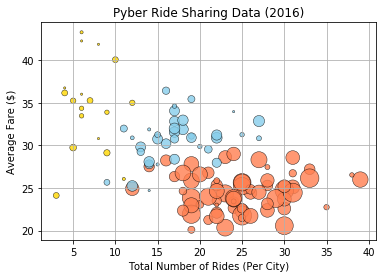

In [5]:
fig, ax = plt.subplots()

colors = {'Urban':'Coral', 'Suburban':'SkyBlue', 'Rural':'Gold'}

s = city_plus['driver_count'] * 5

ax.scatter(city_plus['rides_per_city'], city_plus['average_fare'],\
          s = s, c = city_plus['type'].apply(lambda x: colors[x]),\
          alpha = 0.8, edgecolor = 'black', linewidth = 0.5)

ax.grid(True)

ax.set_title("Pyber Ride Sharing Data (2016)")

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.show()

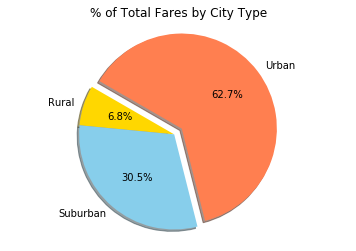

In [6]:
fare_totals = full_data.groupby('type').fare.agg(['sum'])
fare_totals['type'] = fare_totals.index

fare_type_labels = list(fare_totals.index.values)

explode1 = (0, 0, 0.1)

fig1, ax1 = plt.subplots()

ax1.pie(fare_totals['sum'], explode = explode1, labels = fare_type_labels,\
        colors = fare_totals['type'].apply(lambda x: colors[x]),\
        autopct='%1.1f%%', shadow = True, startangle = 150)

ax1.axis('equal')

ax1.set_title("% of Total Fares by City Type")

plt.show()

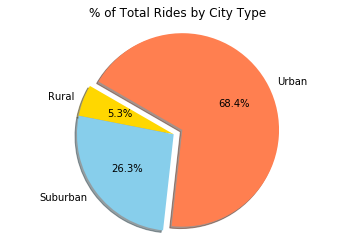

In [7]:
ride_totals = full_data.groupby('type').ride_id.agg(['count'])
ride_totals['type'] = ride_totals.index

ride_type_labels = list(fare_totals.index.values)

explode2 = (0, 0, 0.1)

fig2, ax2 = plt.subplots()

ax2.pie(ride_totals['count'], explode = explode2, labels = ride_type_labels,\
        colors = ride_totals['type'].apply(lambda x: colors[x]),\
        autopct='%1.1f%%', shadow = True, startangle = 150)

ax2.axis('equal')

ax2.set_title("% of Total Rides by City Type")

plt.show()

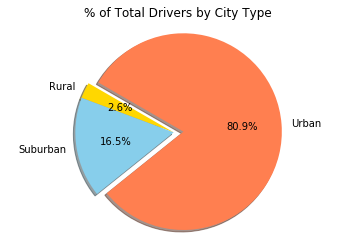

In [8]:
driver_totals = city_plus.groupby('type').driver_count.agg(['sum'])
driver_totals['type'] = driver_totals.index

driver_type_labels = list(fare_totals.index.values)

explode3 = (0, 0, 0.1)

fig3, ax3 = plt.subplots()

ax3.pie(driver_totals['sum'], explode = explode3, labels = driver_type_labels,\
        colors = driver_totals['type'].apply(lambda x: colors[x]),\
        autopct='%1.1f%%', shadow = True, startangle = 150)

ax3.axis('equal')

ax3.set_title("% of Total Drivers by City Type")

plt.show()

In [9]:
print('THREE OBSERVABLE TRENDS:')
print('')
print('FIRST: URBAN CITIES ACCOUNT FOR THE VAST MAJORITY OF RIDES, DRIVERS, AND FARES')
print('SECOND: FARES TEND TO BE LOWEST IN URBAN CITIES AND HIGHEST IN RURAL CITIES')
print('THIRD: THE AVERAGE FARE OF A CITY SEEMS TO BE INVERSELEY CORRELATED WITH ITS RIDE COUNT')

THREE OBSERVABLE TRENDS:

FIRST: URBAN CITIES ACCOUNT FOR THE VAST MAJORITY OF RIDES, DRIVERS, AND FARES
SECOND: FARES TEND TO BE LOWEST IN URBAN CITIES AND HIGHEST IN RURAL CITIES
THIRD: THE AVERAGE FARE OF A CITY SEEMS TO BE INVERSELEY CORRELATED WITH ITS RIDE COUNT
